## Portafolio de inversión 

Integrantes de equipo: Milca Correa, Camila Zapata y Arturo Santillanez

Fecha: 23/Oct/2023

**Mejor relación entre rendimiento y riesgo**

1. Elegir los activos 

In [45]:
import yfinance as yf

def getClose(name, start, end):
    return yf.download(name, start, end)["Adj Close"]
data = getClose(["SPOT","AAPL", "MSFT"], "2023-01-01", "2023-09-30")

[*********************100%%**********************]  3 of 3 completed


<Axes: xlabel='Date'>

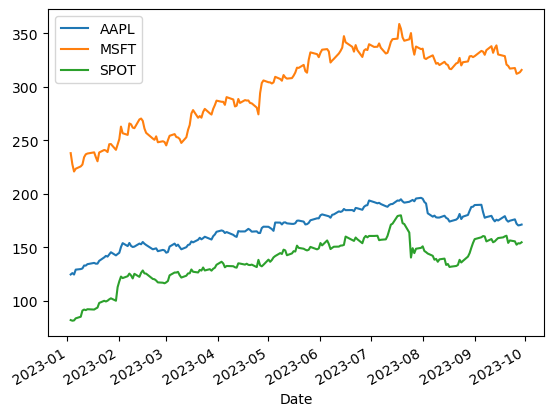

In [46]:
data.plot()

2. Meterlos a la simulación de montecarlo para elegir el mejor portafolio

In [47]:
import numpy as np
import pandas as pd

returns = (data-data.shift())/data.shift()
mean_returns = returns.mean()
cov_matrix = returns.cov()
tasa_libre = 0.0510

num_portfolios = 10000
results = []

for i in range(num_portfolios):
    weights = np.random.random(len(data.columns))
    weights /= np.sum(weights)
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_vol = np.sqrt(weights.T @ cov_matrix @ weights) *np.sqrt(252)
    var_ret = (portfolio_return-tasa_libre)/portfolio_vol
    results.append([portfolio_return, portfolio_vol, weights,var_ret])

results_df = pd.DataFrame(results, columns=['Retorno', 'Volatilidad', 'Pesos','Relación entre volatilidad y riesgo'])
variance_portfolio = results_df.iloc[results_df['Relación entre volatilidad y riesgo'].idxmax()]

<Axes: ylabel='Frequency'>

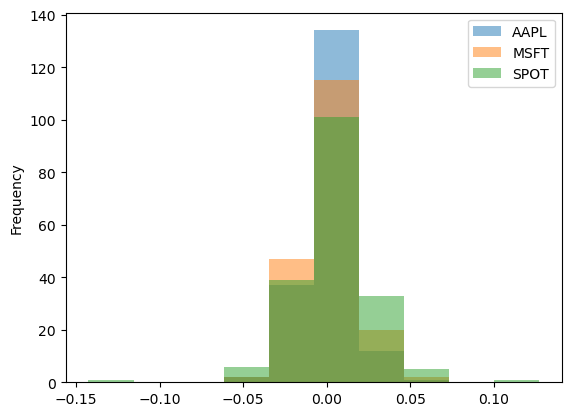

In [48]:
returns.plot.hist(alpha=0.5)

3. Resultados 

In [49]:
print(data.columns)
print("Pesos:", variance_portfolio['Pesos'])

Index(['AAPL', 'MSFT', 'SPOT'], dtype='object')
Pesos: [0.44152291 0.14344004 0.41503705]


**Retorno**

In [50]:
variance_portfolio['Retorno']

0.6506886868265489

**Volatilidad**

In [51]:
variance_portfolio['Volatilidad']

0.23461235121754154

**Rendimientos diarios**

In [52]:
returns.mean()

AAPL    0.001802
MSFT    0.001660
SPOT    0.003731
dtype: float64

**Gráficos**

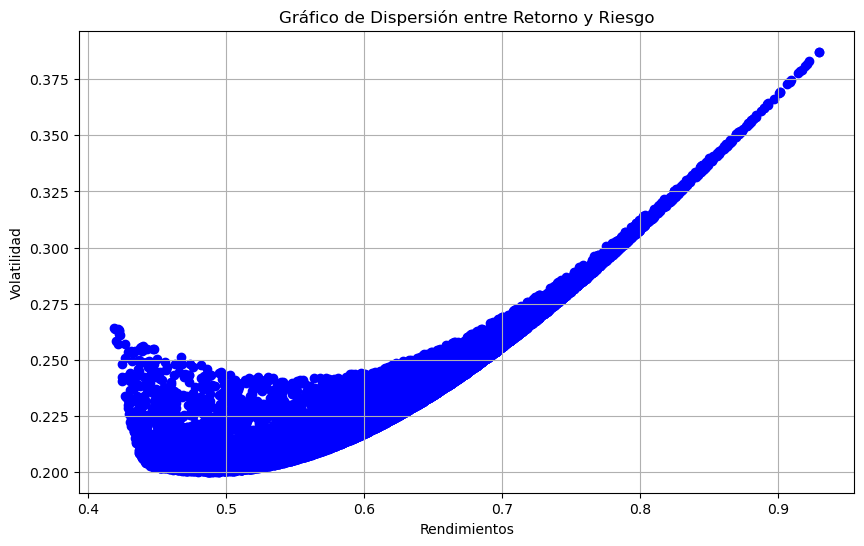

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(results_df['Retorno'], results_df['Volatilidad'], c='blue')
plt.title('Gráfico de Dispersión entre Retorno y Riesgo')
plt.xlabel('Rendimientos')
plt.ylabel('Volatilidad')
plt.grid(True)
plt.show()

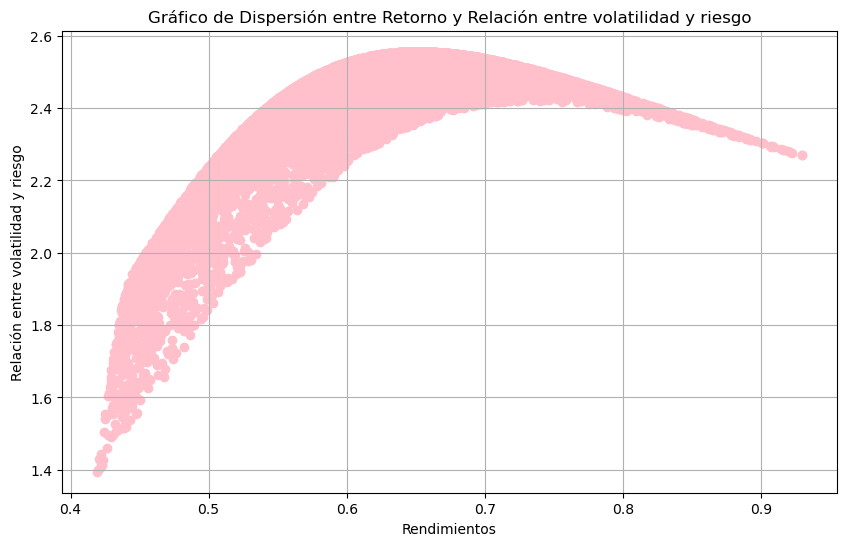

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Retorno'], results_df['Relación entre volatilidad y riesgo'], c='pink')
plt.title('Gráfico de Dispersión entre Retorno y Relación entre volatilidad y riesgo')
plt.xlabel('Rendimientos')
plt.ylabel('Relación entre volatilidad y riesgo')
plt.grid(True)
plt.show()